# Machine Learning Assignment: Used Car Dataset

#### Deployed on streamlit: https://gdsc-ml-submission-jngma4gxhu7da7vuxxlbam.streamlit.app/

In [361]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling

### Load Dataset

In [362]:
used_car_df = pd.read_csv("used_car_dataset.csv")

used_car_df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


## Data Assesing & Availability Checking

Terdapat 9582 rows dan 11 columns dengan 2 columns bertipe numerik dan 9 columns bertipe string/categorical column

In [363]:
used_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


### Descriptive Statistics pra-cleaning data

In [364]:
numeric_cols_summary = used_car_df.describe()

categorical_cols = [col for col in used_car_df.columns if col not in numeric_cols_summary.columns]
categorical_cols_summary = {
    col: used_car_df[col].value_counts() for col in categorical_cols
}

print("Numeric Columns Summary:\n", numeric_cols_summary)
print("\n\nCategorical Columns Summary")
for col, summary in categorical_cols_summary.items():
    print(f"\n{summary}")

Numeric Columns Summary:
               Year          Age
count  9582.000000  9582.000000
mean   2016.361094     7.638906
std       4.087226     4.087226
min    1986.000000     0.000000
25%    2014.000000     5.000000
50%    2017.000000     7.000000
75%    2019.000000    10.000000
max    2024.000000    38.000000


Categorical Columns Summary

Brand
Maruti Suzuki    2720
Hyundai          1529
Honda             802
Toyota            777
Mahindra          560
Mercedes-Benz     402
Tata              389
BMW               342
Volkswagen        318
Audi              264
Ford              245
Renault           240
Skoda             183
Kia               161
Chevrolet          89
MG                 80
Nissan             75
Jeep               74
Land Rover         71
Volvo              48
Mini               41
Jaguar             34
Porsche            24
Datsun             22
Fiat               22
Lexus              20
Mitsubishi         18
Isuzu              10
Force               6
Ambassador 

In [365]:
used_car_df.columns

Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedDate', 'AdditionInfo', 'AskPrice'],
      dtype='object')

Terdapat 47 rows di column kmDriven yang  memiliki null value

In [366]:
used_car_df.isna().sum()

Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64

Terdapat 724 rows yang duplicate

In [367]:
used_car_df.duplicated().sum()

np.int64(724)

### Observation setelah assesing dan check availability data
- Tipe data column masih ada yang belum sesuai
- Penamaan column masih belum konsisten 
- Value column ada yang masih belum konsisten
- Terdapat 47 rows yang memiliki null value di column kmDrive
- Terdapat 724 rows yang duplicate

## Data Cleaning 

Menghapus column AdditionInfo karena columnya kurang jelas,tidak terstruktur,dan redudansi karena infonya sudah ada di column lain

In [368]:
used_car_df = used_car_df.drop("AdditionInfo", axis=1)

Memperbaiki value dari column kmDriven agar lebih konsisten

In [369]:
used_car_df["kmDriven"] = (
    used_car_df["kmDriven"]
    .replace({"km": "", ",": "", "K": "000", "Lakh": "00000"}, regex=True)
    .astype("float")
    .map(lambda x:round(x,2))
)

Memperbaiki value dari column AskPrice agar lebih konsisten dan sesuai standar dan mengkonversi ke IDR

In [370]:
used_car_df["AskPrice"] = (
    used_car_df["AskPrice"]
    .replace({"₹": "", ",": ""},regex=True)
    .astype("int")
    .map(lambda x: x* 190)
)

Memperbaiki format date dari column PostedDate

In [371]:
used_car_df["PostedDate"] = pd.to_datetime(
    used_car_df["PostedDate"], format="%b-%y", errors="coerce"
)

Mengubah nama colum kmDriven dan model agar konsisten dengan nama column lain

In [372]:
used_car_df = used_car_df.rename(columns={"kmDriven": "KMDriven", "model": "Model"})

Menghapus rows karena hanya sebagian kecil rows saja (0.49%) yang memiliki null value jadi lebih baik menghapus data ketimbang mengimputasi data agar data lebih akurat

In [373]:
used_car_df = used_car_df.dropna()

Menghapus rows yang duplicate

In [374]:
used_car_df  = used_car_df.drop_duplicates()

In [375]:
used_car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8735 entries, 0 to 9581
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Brand         8735 non-null   object        
 1   Model         8735 non-null   object        
 2   Year          8735 non-null   int64         
 3   Age           8735 non-null   int64         
 4   KMDriven      8735 non-null   float64       
 5   Transmission  8735 non-null   object        
 6   Owner         8735 non-null   object        
 7   FuelType      8735 non-null   object        
 8   PostedDate    8735 non-null   datetime64[ns]
 9   AskPrice      8735 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 750.7+ KB


### Descriptive Statistics post-cleaning data

In [376]:
numeric_cols_summary = used_car_df.describe()

categorical_cols = [
    col for col in used_car_df.columns if col not in numeric_cols_summary.columns
]
categorical_cols_summary = {
    col: used_car_df[col].value_counts() for col in categorical_cols
}

print("Numeric Columns Summary:\n", numeric_cols_summary)
print("\n\nCategorical Columns Summary")
for col, summary in categorical_cols_summary.items():
    print(f"\n{summary}")

Numeric Columns Summary:
               Year          Age       KMDriven                     PostedDate  \
count  8735.000000  8735.000000    8735.000000                           8735   
mean   2016.395650     7.604350   70995.683457  2024-10-27 05:16:31.184888320   
min    1986.000000     0.000000       0.000000            2023-12-01 00:00:00   
25%    2014.000000     5.000000   43000.000000            2024-11-01 00:00:00   
50%    2017.000000     7.000000   65321.000000            2024-11-01 00:00:00   
75%    2019.000000    10.000000   86000.000000            2024-11-01 00:00:00   
max    2024.000000    38.000000  980002.000000            2024-11-01 00:00:00   
std       4.116027     4.116027   57064.988317                            NaN   

           AskPrice  
count  8.735000e+03  
mean   1.984083e+08  
min    2.850000e+06  
25%    6.669000e+07  
50%    1.121000e+08  
75%    2.042500e+08  
max    8.075000e+09  
std    3.152135e+08  


Categorical Columns Summary

Brand
Maruti Su

## Exploratory Data Analysis & Data Visualization

<Axes: >

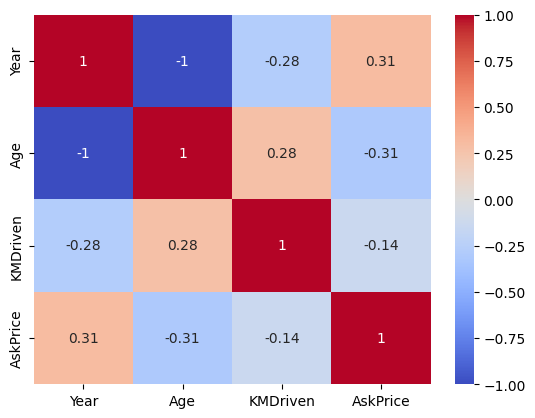

In [377]:
sns.heatmap(used_car_df.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [378]:
used_car_df.sample(5)

,Brand,Model,Year,Age,KMDriven,Transmission,Owner,FuelType,PostedDate,AskPrice
6841,Maruti Suzuki,Ignis,2019,5,29770.0,Automatic,second,Petrol,2024-11-01,99750000
7580,Maruti Suzuki,Wagon-R-1-0,2017,7,85000.0,Manual,second,Hybrid/CNG,2024-11-01,64600000
2834,Ford,Ecosport,2015,9,52000.0,Manual,first,Petrol,2024-11-01,99750000
5362,Hyundai,Verna,2014,10,80000.0,Manual,first,Diesel,2024-11-01,123500000
3968,Volkswagen,VentoTest,2015,9,92000.0,Manual,second,Diesel,2024-11-01,85500000


### 1. Brand mobil apa yang memiliki rata rata harga penjualan tertinggi?

In [379]:
mean_price_by_brand = used_car_df.groupby("Brand")["AskPrice"].mean().reset_index()
top_10_mean_price_by_brand = mean_price_by_brand.nlargest(10, columns="AskPrice")
top_10_mean_price_by_brand

,Brand,AskPrice
2,Aston Martin,5.016000e+09
31,Rolls-Royce,4.059825e+09
6,Bentley,3.515000e+09
23,Maserati,1.520000e+09
29,Porsche,1.463201e+09
19,Lexus,1.307750e+09
18,Land Rover,1.052923e+09
24,Mercedes-Benz,6.796986e+08
4,BMW,5.805564e+08
25,Mini,5.716862e+08


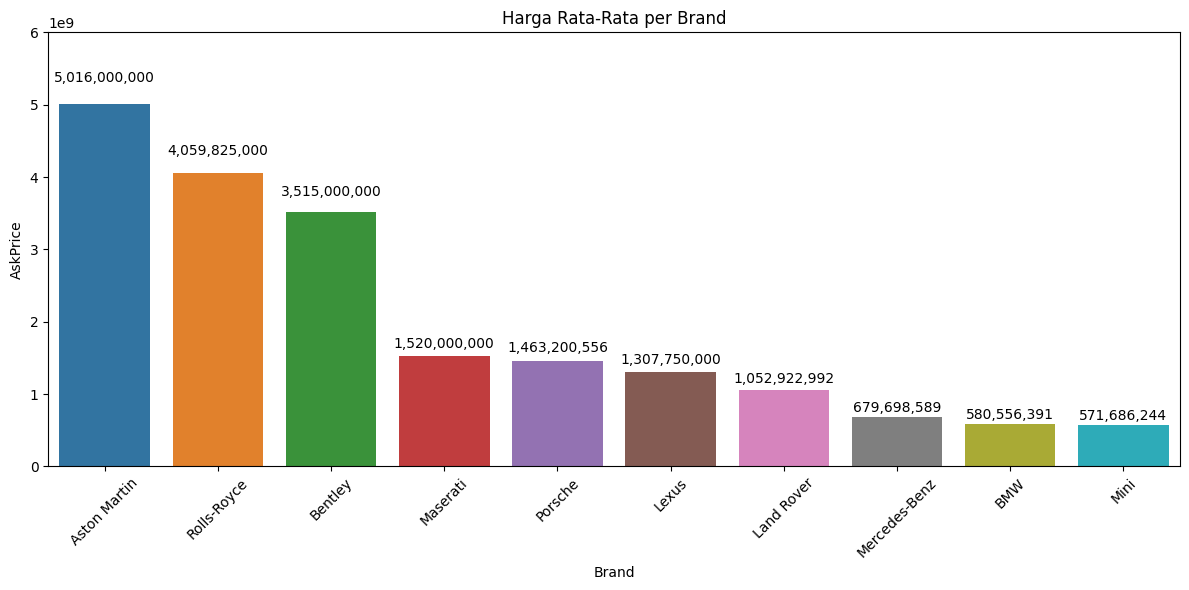

In [380]:
formatted_price = top_10_mean_price_by_brand["AskPrice"].apply(lambda x: f"{x:,.0f}")

plt.figure(figsize=(12,6))

plt.title("Harga Rata-Rata per Brand")
plt.ylim(0, 6_000_000_000)
plt.xticks(rotation=45)
sns.barplot(
    data=top_10_mean_price_by_brand,
    x="Brand",
    y="AskPrice",
    palette="tab10",
    hue="Brand",
)

for i, value in enumerate(top_10_mean_price_by_brand["AskPrice"]):
    plt.text(
        x=i,
        y=value + 0.05 * value,
        s=f"{value:,.0f}",
        ha="center",
        va="bottom",
    )


plt.tight_layout()

### Observation

Brand mobil dengan rata rata harga penjualan tertinggi itu dimiliki oleh Aston Martin,diikuti Rolls-Royce dan Bentley

### 2. Mobil dengan jenis transmission apa yang paling sering dijual?

In [381]:
value_transmission = used_car_df.groupby("Transmission")["Transmission"].value_counts()
value_transmission

Transmission
Automatic    4124
Manual       4611
Name: count, dtype: int64

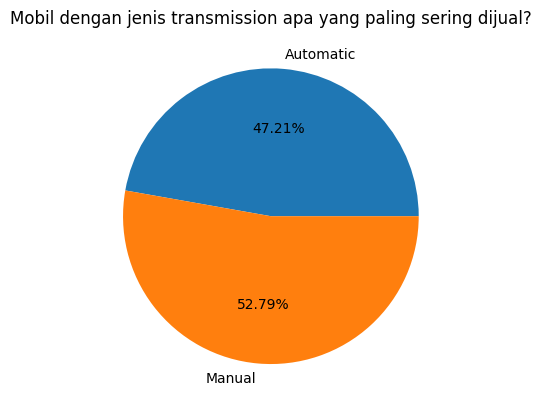

In [382]:
fig, ax = plt.subplots()
labels = ["Automatic", "Manual"]
ax.pie(data=value_transmission, autopct="%1.2f%%", labels=labels, x=value_transmission.values)
ax.set_title("Mobil dengan jenis transmission apa yang paling sering dijual?")
plt.show()

### Observation

Lebih dari setengah penjualan mobil jenis transmisinya adalah manual

### 3. Apakah ada korelasi terhadap jumlah kilometer dan harga penjualan dan jika ada bagaimana distribusinya?

In [383]:
def categorize_kmdriven(km):
    if km < 15000:
        return "Sangat Rendah"
    elif km < 30000:
        return "Rendah"
    elif km < 45000:
        return "Sedang"
    elif km < 60000:
        return "Tinggi"
    else:
        return "Sangat Tinggi"

def categorize_price(price):
    if price < 200_000_000:
        return "Murah"
    elif price < 700_000_000:
        return "Sedang"
    else:
        return "Mahal"

In [384]:
used_car_df["TempKMDriven"] = used_car_df["KMDriven"].apply(categorize_kmdriven)
used_car_df["TempAskPrice"] = used_car_df["AskPrice"].apply(categorize_price)

Melakukan Binning/Kategorisasi pada column KMDrive dan AskPrice untuk mempermudah proses EDA

In [385]:
used_car_df.groupby("TempKMDriven")["AskPrice"].mean().reset_index()

,TempKMDriven,AskPrice
0,Rendah,3.874737e+08
1,Sangat Rendah,3.726503e+08
2,Sangat Tinggi,1.443611e+08
3,Sedang,2.517168e+08
4,Tinggi,1.902586e+08


<Axes: title={'center': 'KM Driven vs Price'}, xlabel='TempKMDriven', ylabel='AskPrice'>

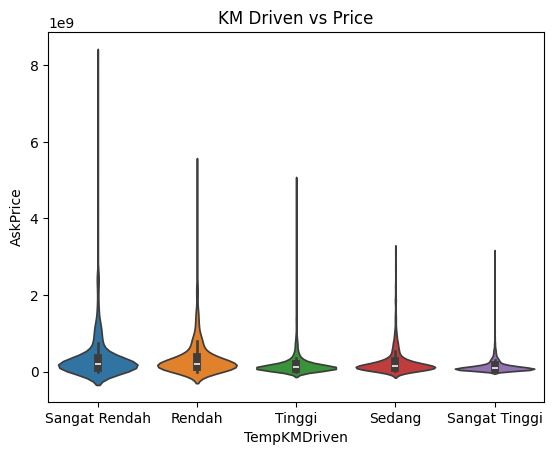

In [386]:
fig, axes = plt.subplots()

plt.title("KM Driven vs Price")
sns.violinplot(
    used_car_df.sort_values(ascending=False, by="AskPrice"),
    x="TempKMDriven",
    y="AskPrice",
    palette="tab10",
    hue="TempKMDriven",
)

<Axes: xlabel='KMDriven', ylabel='AskPrice'>

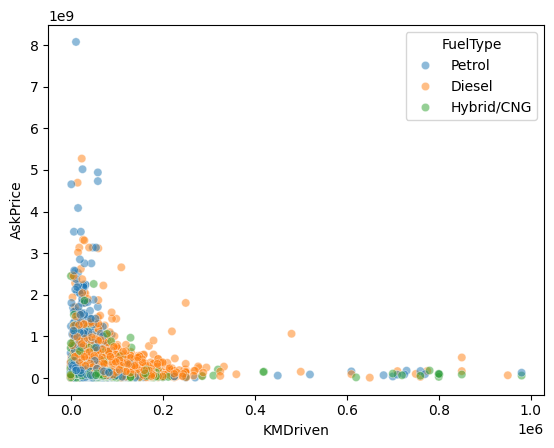

In [387]:
sns.scatterplot(
    x=used_car_df["KMDriven"], y=used_car_df["AskPrice"], hue=used_car_df["FuelType"],palette="tab10",alpha=0.5
)

Scatterplot KMDriven vs AskPrice dengan FuelType

### Observation

Terdapat korelasi negatif antara tinggi kilometer dan harga jual yang artinya semakin tinggi kilometer maka semakin turun/rendah harga jualnya

### 4. Bagaimana distribusi harga terhadap perbedaan owner,tranmisi,dan jenis bahan bakar

In [388]:
for i, col in enumerate(used_car_df[["Owner", "Transmission", "FuelType"]]):
    print(used_car_df.groupby(col)["AskPrice"].mean().reset_index())
    print("\n")

    Owner      AskPrice
0   first  2.401486e+08
1  second  1.531523e+08


  Transmission      AskPrice
0    Automatic  3.015762e+08
1       Manual  1.061367e+08


     FuelType      AskPrice
0      Diesel  2.638005e+08
1  Hybrid/CNG  1.047764e+08
2      Petrol  1.809689e+08




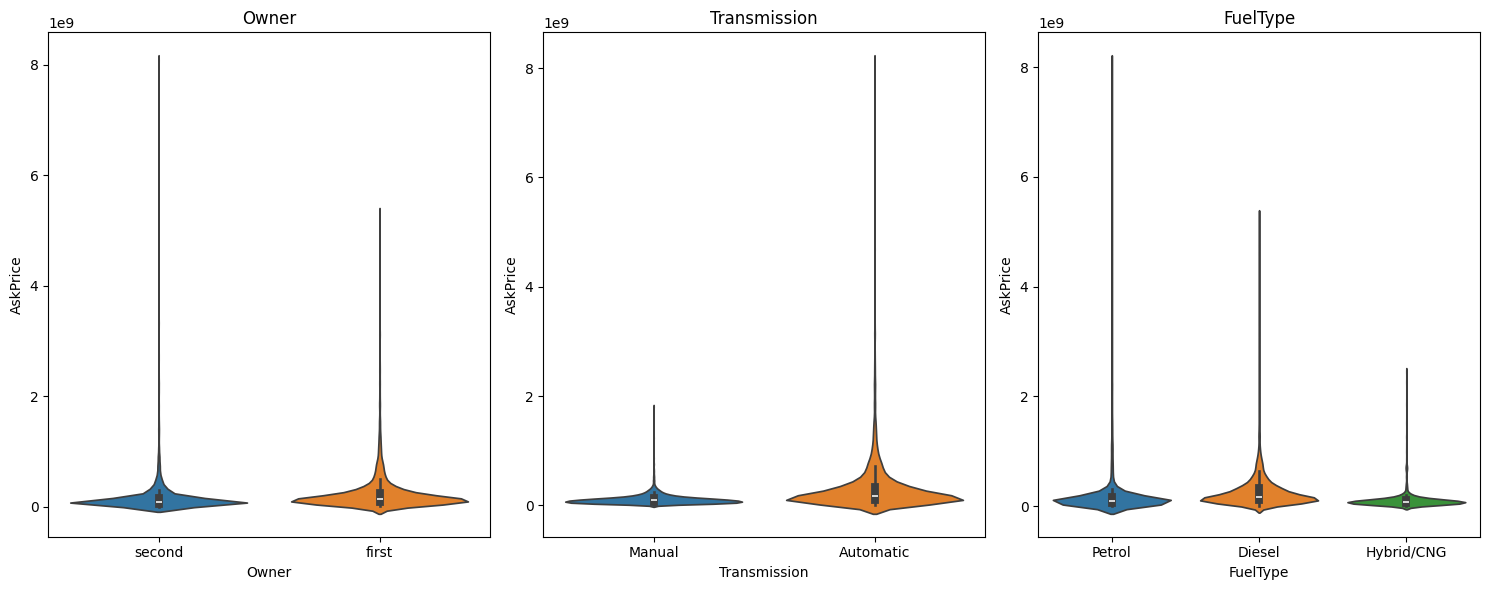

In [389]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6))


for i, col in enumerate(used_car_df[["Owner", "Transmission", "FuelType"]]):
    sns.violinplot(used_car_df, x=col, y="AskPrice", ax=axes[i],palette="tab10",hue=col)

    axes[i].set_title(col.replace("_", " "))
plt.tight_layout()

### Observation

- Mobil dengan kepemilikan pertama memiliki harga jual yang lebih tinggi dibandingkan dengan mobil dengan kepemilikan kedua (indikasi korelasi negatif yang artinya semakin banyak pemilik sebelumnya semakin turun/rendah harga jualnya)

- Mobil dengan transmisi automatic cenderung memiliki harga jual yang lebih tinggi dibandingkan dengan transmisi manual

- Mobil dengan bahan bakar Diesel cenderung memiliki harga jual yang lebih tinggi dibandingkan Petrol dan Hybrid/CNG
(Hybrid/CNG menunjukkan distribusi harga yang lebih rendah dibandingkan kedua jenis bahan bakar lainnya)


Dapat disimpulkan bahwa Mobil yang dijual dengan spesifikasi Owner pertama,transmisi automatic dan berbahan bakar diesel cenderung harga jualnya lebih tinggi dibanding mobil dengan spesifikasi Owner Second,transmisi manual dan bahan bakar Hybrid/CNG

In [391]:
used_car_df.to_csv("cleaned_dataset.csv")

# Conclusion

Brand mobil mewah seperti Aston Martin dan Rolls-Royce cenderung memiliki harga jual yang tetap tinggi. Umur dan jumlah kilometer sangat memengaruhi harga jual mobil, sementara mobil dengan transmisi automatic dan bahan bakar diesel memiliki harga jual lebih tinggi dibandingkan kategori lainnya dan kepemilikan pertama menunjukkan harga jual lebih tinggi juga.